In [41]:
!git clone https://github.com/undpindia/Data4Policy.git


Cloning into 'Data4Policy'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (861/861), done.
remote: Compressing objects: 100% (484/484), done.
remote: Total 861 (delta 321), reused 857 (delta 319), pack-reused 0
Receiving objects: 100% (861/861), 59.17 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (321/321), done.


In [42]:
%cd /content/Data4Policy/Geospatial Data Science Internship


/content/Data4Policy/Geospatial Data Science Internship


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [44]:
df=pd.read_csv("/content/Data4Policy/Geospatial Data Science Internship/Datasets/telangana_fires.csv")
df.head()

,fireID,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,0,18.3777,80.5314,318.6,1.0,1.0,02/01/15,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0
1,1,17.5898,80.9893,315.4,1.2,1.1,04/01/15,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0
2,2,17.6028,81.1612,311.8,1.2,1.1,05/01/15,527,Terra,MODIS,46,6.03,299.8,6.0,D,0
3,3,17.5241,80.3135,317.0,1.1,1.0,05/01/15,527,Terra,MODIS,69,6.03,302.0,9.3,D,0
4,4,17.7571,80.3404,317.2,2.5,1.5,05/01/15,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0


In [45]:
df=df.drop(['version'],axis=1)
df=df.drop(['fireID'],axis=1)
df=df.drop(['instrument'],axis=1)

In [46]:
mon=[]
year=[]
for id in df.index:
  date=df['acq_date'][id]
  temp=date.split('/')
  date=temp[1]
  mon.append(int(date))
  date=temp[2] 
  year.append(int('20'+date))
df['mon']=mon
df['year']=year
df=df.drop(['acq_date'],axis=1)
df.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type,mon,year
0,18.3777,80.5314,318.6,1.0,1.0,802,Aqua,69,302.6,7.7,D,0,1,2015
1,17.5898,80.9893,315.4,1.2,1.1,750,Aqua,59,299.5,8.8,D,0,1,2015
2,17.6028,81.1612,311.8,1.2,1.1,527,Terra,46,299.8,6.0,D,0,1,2015
3,17.5241,80.3135,317.0,1.1,1.0,527,Terra,69,302.0,9.3,D,0,1,2015
4,17.7571,80.3404,317.2,2.5,1.5,833,Aqua,53,300.0,29.3,D,0,1,2015


In [47]:
idi=[]
for id in df.index:
  if df['daynight'][id]=='D':
    idi.append(1)
  else:
    idi.append(0)
df['day']=idi
df=df.drop(['daynight'],axis=1)
df.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,type,mon,year,day
0,18.3777,80.5314,318.6,1.0,1.0,802,Aqua,69,302.6,7.7,0,1,2015,1
1,17.5898,80.9893,315.4,1.2,1.1,750,Aqua,59,299.5,8.8,0,1,2015,1
2,17.6028,81.1612,311.8,1.2,1.1,527,Terra,46,299.8,6.0,0,1,2015,1
3,17.5241,80.3135,317.0,1.1,1.0,527,Terra,69,302.0,9.3,0,1,2015,1
4,17.7571,80.3404,317.2,2.5,1.5,833,Aqua,53,300.0,29.3,0,1,2015,1


In [48]:
idi=[]
for id in df.index:
  if df['satellite'][id]=='Aqua':
    idi.append(1)
  else:
    idi.append(0)
df['sat_Aqua']=idi
df=df.drop(['satellite'],axis=1)
df.head()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type,mon,year,day,sat_Aqua
0,18.3777,80.5314,318.6,1.0,1.0,802,69,302.6,7.7,0,1,2015,1,1
1,17.5898,80.9893,315.4,1.2,1.1,750,59,299.5,8.8,0,1,2015,1,1
2,17.6028,81.1612,311.8,1.2,1.1,527,46,299.8,6.0,0,1,2015,1,0
3,17.5241,80.3135,317.0,1.1,1.0,527,69,302.0,9.3,0,1,2015,1,0
4,17.7571,80.3404,317.2,2.5,1.5,833,53,300.0,29.3,0,1,2015,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


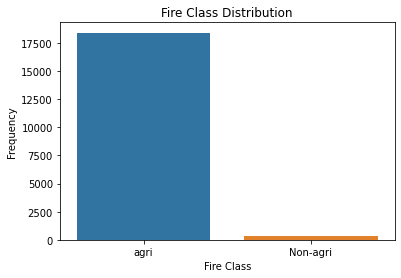

0: Agricultural , 2: Non-agricultural
0    18413
2      372
Name: type, dtype: int64


In [49]:
import seaborn as sns


sns.countplot(df.type)
plt.title("Fire Class Distribution")
plt.xticks(range(2), ["agri", "Non-agri"])
plt.xlabel("Fire Class")
plt.ylabel("Frequency")
plt.show()
print("0: Agricultural , 2: Non-agricultural")
print(df.type.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


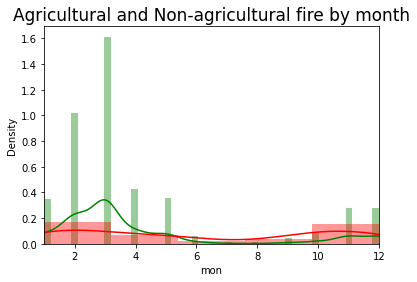

In [50]:
sns.distplot(df[df['type'] == 0]["mon"], color='g')
sns.distplot(df[df['type'] == 2]["mon"], color='r')
plt.title('Agricultural and Non-agricultural fire by month', fontsize=17)
plt.xlim([1,12])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

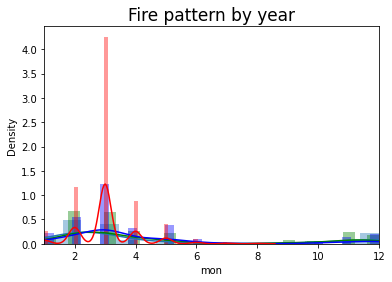

In [51]:
sns.distplot(df[df['year'] == 2015]["mon"])
sns.distplot(df[df['year'] == 2017]["mon"], color='g')
sns.distplot(df[df['year'] == 2019]["mon"], color='b')
sns.distplot(df[df['year'] == 2021]["mon"], color='r')

plt.title('Fire pattern by year', fontsize=17)
plt.xlim([1,12])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

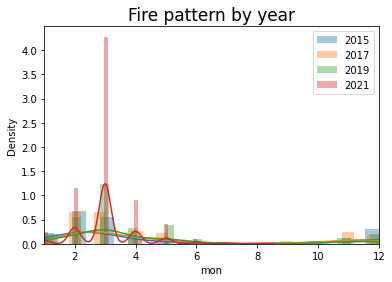

In [52]:
sns.distplot(df[(df['year'] == 2015) & (df['type']==0)]["mon"], label='2015')
sns.distplot(df[(df['year'] == 2017) & (df['type']==0)]["mon"], label='2017')
sns.distplot(df[(df['year'] == 2019) & (df['type']==0)]["mon"], label='2019')
sns.distplot(df[(df['year'] == 2021) & (df['type']==0)]["mon"], label='2021')


plt.legend()

# sns.distplot(df[df['year'] == 2017]["mon"], color='g')
# sns.distplot(df[df['year'] == 2019]["mon"], color='b')
# sns.distplot(df[df['year'] == 2021]["mon"], color='r')

plt.title('Fire pattern by year', fontsize=17)
plt.xlim([1,12])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

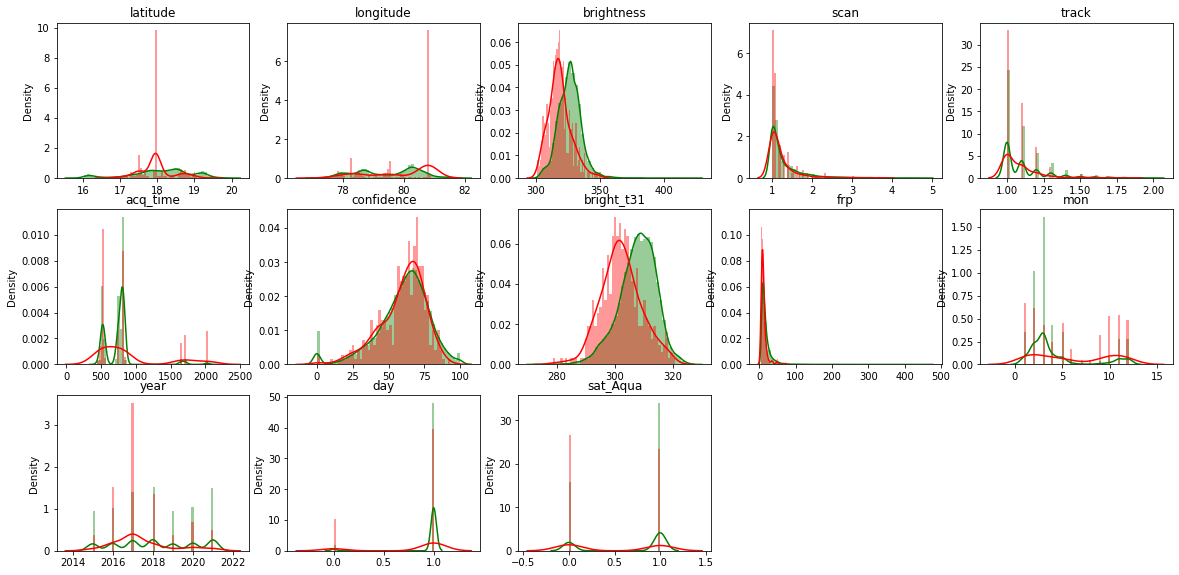

In [53]:
import matplotlib.gridspec as gridspec

columns = df.drop('type', axis=1).columns
grid = gridspec.GridSpec(6, 5)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.type==0][col], bins = 50, color='g')
    sns.distplot(df[df.type==2][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [54]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

In [55]:
columns= df.drop('type', axis=1).columns
normal= df[df.type==0]
fraud= df[df.type==2]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)
    else:
        print("--------------", i,"is INSIGNIFICANT ------------------") 

latitude  is statistically significant
longitude  is statistically significant
brightness  is statistically significant
scan  is statistically significant
track  is statistically significant
acq_time  is statistically significant
-------------- confidence is INSIGNIFICANT ------------------
bright_t31  is statistically significant
frp  is statistically significant
mon  is statistically significant
year  is statistically significant
day  is statistically significant
sat_Aqua  is statistically significant


In [56]:
temp=df['type']
df['class']=temp
df=df.drop(['type'],axis=1)

In [57]:
columns = df.columns.tolist()
target=columns[-1]
columns = columns[:-1]
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]
y_train[y_train==2]=1
print(X_train.shape)
print(y_train.shape)

(18785, 13)
(18785,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1


In [59]:
import itertools
classes = np.array(['0','1'])

def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy:0.961671546446633
All accuracy:[0.961671546446633]


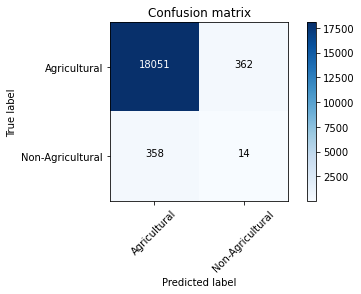

In [60]:
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc=[]
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))


In [61]:
X_train=X_train.drop(['confidence'],axis=1)

In [62]:
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()


,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,mon,year,day,sat_Aqua
0,18.3777,80.5314,318.6,1.0,1.0,802,302.6,7.7,1,2015,1,1
1,17.5898,80.9893,315.4,1.2,1.1,750,299.5,8.8,1,2015,1,1
2,17.6028,81.1612,311.8,1.2,1.1,527,299.8,6.0,1,2015,1,0
3,17.5241,80.3135,317.0,1.1,1.0,527,302.0,9.3,1,2015,1,0
4,17.7571,80.3404,317.2,2.5,1.5,833,300.0,29.3,1,2015,1,1


Accuracy:0.9626297577854671
All accuracy:[0.961671546446633, 0.9626297577854671]


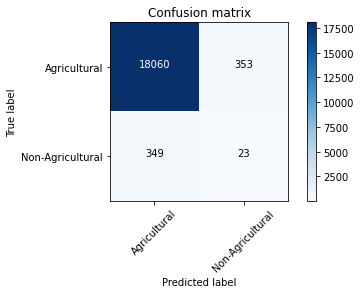

In [63]:
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))


In [64]:
change = X_train[['latitude','longitude']]
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(change)
scaled_data = scalar.transform(change)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 1)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(18785, 1)

In [65]:
X_train['loc']=x_pca
X_train=X_train.drop(['latitude'],axis=1)
X_train=X_train.drop(['longitude'],axis=1)
X_train.head()

,brightness,scan,track,acq_time,bright_t31,frp,mon,year,day,sat_Aqua,loc
0,318.6,1.0,1.0,802,302.6,7.7,1,2015,1,1,-0.487333
1,315.4,1.2,1.1,750,299.5,8.8,1,2015,1,1,-1.496181
2,311.8,1.2,1.1,527,299.8,6.0,1,2015,1,0,-1.604571
3,317.0,1.1,1.0,527,302.0,9.3,1,2015,1,0,-1.082837
4,317.2,2.5,1.5,833,300.0,29.3,1,2015,1,1,-0.897589


Accuracy:0.9628426936385414
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414]


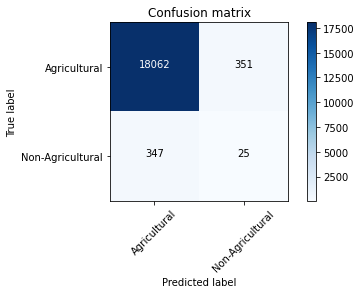

In [66]:
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



Accuracy:0.9629491615650785
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785]


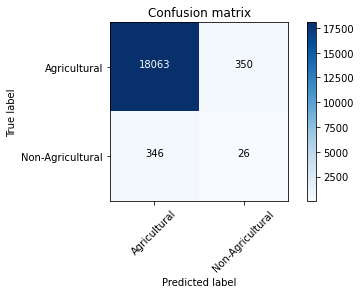

In [67]:
X_train=X_train.drop(['bright_t31'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



In [68]:
X_train.head()

,brightness,scan,track,acq_time,frp,mon,year,day,sat_Aqua,loc
0,318.6,1.0,1.0,802,7.7,1,2015,1,1,-0.487333
1,315.4,1.2,1.1,750,8.8,1,2015,1,1,-1.496181
2,311.8,1.2,1.1,527,6.0,1,2015,1,0,-1.604571
3,317.0,1.1,1.0,527,9.3,1,2015,1,0,-1.082837
4,317.2,2.5,1.5,833,29.3,1,2015,1,1,-0.897589


Accuracy:0.9629491615650785
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785]


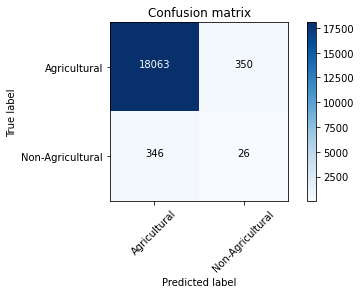

In [69]:
X_train=X_train.drop(['day'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



Accuracy:0.9629491615650785
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785, 0.9629491615650785]


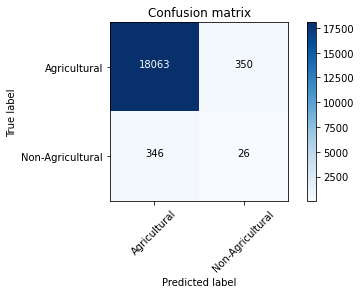

In [70]:
X_train=X_train.drop(['year'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



In [71]:
X_train.head()

,brightness,scan,track,acq_time,frp,mon,sat_Aqua,loc
0,318.6,1.0,1.0,802,7.7,1,1,-0.487333
1,315.4,1.2,1.1,750,8.8,1,1,-1.496181
2,311.8,1.2,1.1,527,6.0,1,0,-1.604571
3,317.0,1.1,1.0,527,9.3,1,0,-1.082837
4,317.2,2.5,1.5,833,29.3,1,1,-0.897589


Accuracy:0.9634815011977642
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785, 0.9629491615650785, 0.9634815011977642]


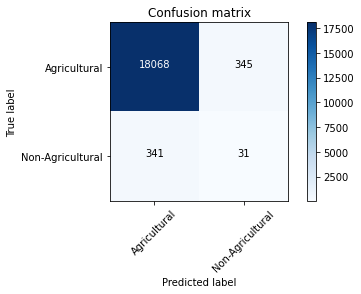

In [72]:
X_train=X_train.drop(['frp'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



Accuracy:0.9634815011977642
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785, 0.9629491615650785, 0.9634815011977642, 0.9634815011977642]


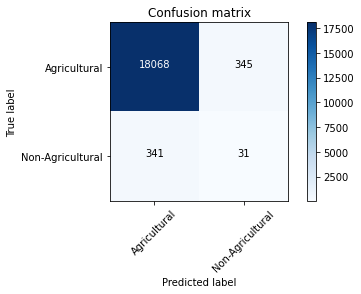

In [73]:
X_train=X_train.drop(['scan'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



Accuracy:0.9634815011977642
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785, 0.9629491615650785, 0.9634815011977642, 0.9634815011977642, 0.9634815011977642]


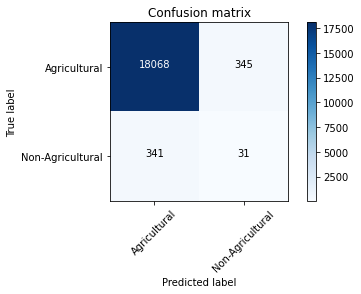

In [74]:
X_train=X_train.drop(['track'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



Accuracy:0.9634815011977642
All accuracy:[0.961671546446633, 0.9626297577854671, 0.9628426936385414, 0.9629491615650785, 0.9629491615650785, 0.9629491615650785, 0.9634815011977642, 0.9634815011977642, 0.9634815011977642, 0.9634815011977642]


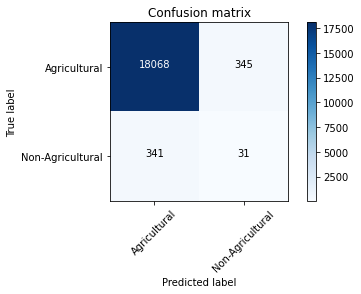

In [75]:
X_train=X_train.drop(['sat_Aqua'],axis=1)
model = LocalOutlierFactor(contamination=0.02)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
X_train.head()
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy=(cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0])
acc.append(accuracy)
plot_confusion_matrix(cm_train,["Agricultural", "Non-Agricultural"])
print('Accuracy:'+str(accuracy))
print('All accuracy:'+str(acc))



In [76]:
X_train.head()

,brightness,acq_time,mon,loc
0,318.6,802,1,-0.487333
1,315.4,750,1,-1.496181
2,311.8,527,1,-1.604571
3,317.0,527,1,-1.082837
4,317.2,833,1,-0.897589


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

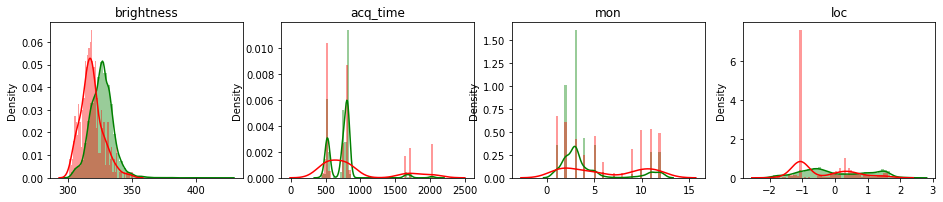

In [77]:
import matplotlib.gridspec as gridspec

X_train['type']=y_train
new_df=X_train

columns = new_df.drop('type', axis=1).columns
grid = gridspec.GridSpec(6, 5)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(new_df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(new_df[new_df.type==0][col], bins = 50, color='g')
    sns.distplot(new_df[new_df.type==1][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [78]:
import csv
  
field_names = ['fireID', 'class']
  


In [79]:
y_train_pred[y_train_pred==0]=3
y_train_pred[y_train_pred==1]=0
y_train_pred[y_train_pred==3]=1

dic2=[]
count=0
for i in range(y_train_pred.size):
  fireID=i
  classs=y_train_pred[i]
  temp={"fireID": fireID,
        "class": classs}
  dic2.append(temp)
  count+=1
with open('Names.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerows(dic2)

  
  

In [80]:
import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'Names.csv'
jsonFilePath = r'output2.json'
csv_to_json(csvFilePath, jsonFilePath)